In [1]:
# import modules
import requests
import shutil
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load IMDB 5000 data
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# encode genre as list and grab genres
genres = set()
genre_list = []
for i in xrange(len(df["genres"])):
    movie_genres = df["genres"].ix[i,].split("|")
    genre_list.append(movie_genres)
    for genre in movie_genres:
        genres.add(genre)
df["genres"] = genre_list
genres = sorted(list(genres))

# check correctness
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
list(df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [5]:
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

## Looking at Countries

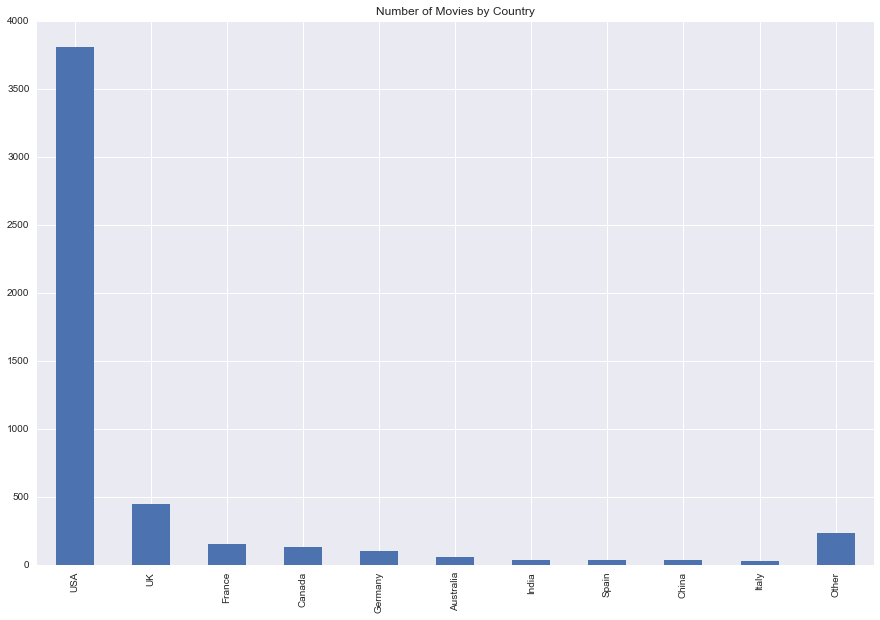

In [6]:
# grab country names
countries = df["country"].unique()
# remove NaN
countries = np.delete(countries, 2)

country_count = df.groupby('country').count()["movie_title"].sort_values(ascending=False)
country_count_top = country_count[0:10]
country_count_top = country_count_top.append(pd.Series(country_count.sum() - country_count_top.sum(), index=["Other"]))
country_count_top.plot(kind='bar',
                      title = "Number of Movies by Country",
                      figsize=(15,10))



### Movie count by country

Here we see that the vast majority of films come from the USA. 

In [7]:
df_genre_country = pd.DataFrame()
top = list(country_count[0:11].index)
for country in top:
    country_movies = df[df["country"] == country]
    genre_count = [0] * len(genres)
    for _, movie in country_movies.iterrows():
        genre_for_movie = movie["genres"]
        for genre in genre_for_movie:
            genre_count[genres.index(genre)] += 1
    df_genre_country[country] = genre_count
    
df_genre_country["Genre"] = genres
df_genre_country.set_index("Genre", inplace = True)
df_genre_country

,USA,UK,France,Canada,Germany,Australia,India,Spain,China,Italy,Japan
Genre,,,,,,,,,,,
Action,861,91,31,26,26,16,7,2,18,2,12
Adventure,685,98,20,13,16,16,3,5,12,2,14
Animation,182,12,12,3,4,2,1,2,2,0,10
Biography,179,57,13,6,9,5,3,2,1,1,0
Comedy,1529,128,41,41,32,16,14,4,6,6,4
Crime,672,77,39,18,29,4,1,4,2,7,1
Documentary,90,11,4,2,2,1,2,0,0,0,0
Drama,1852,265,98,65,54,28,23,24,18,15,8
Family,436,38,12,11,12,8,1,2,2,0,7


In [8]:
def proportionize(series):
    answer = []
    for item in series:
        answer.append(float(item) / float(series.sum()))
    return pd.Series(answer)

df_genre_country_prop = df_genre_country.apply(proportionize)
df_genre_country_prop["Genre"] = genres

In [9]:
df_genre_country_prop = pd.melt(df_genre_country_prop, id_vars=['Genre'], value_vars=top)
df_genre_country_prop.to_csv("data/genre_country_prop.csv")
df_genre_country_prop.head()

,Genre,variable,value
0,Action,USA,0.079027
1,Adventure,USA,0.062873
2,Animation,USA,0.016705
3,Biography,USA,0.016430
4,Comedy,USA,0.140340


![StackedBar](images/stacked_bar_proportion.png)

### Genre Proportion of Movies, Top 10 Countries
Here, we see the proportion that each genre takes up in the movies produced by the top 10 countries. Several interesting patterns emerge. The top six countries---USA, UK, France, Canada, Germany, and Australia---have about the same proportions of genres. Countries seven through ten begin to diverge slightly. India appears to have a higher proportion Romance and Comedy movies, Spain focuses on Mystery, China likes Action, Adventure, and History films, and Italians enjoy movies about Crime. Japan is the most different of them all, with a lower proportion of Drama, but relatively higher Animation, Fantasy, Family, Adventure, and Sci-Fi. Here, we get a glimpse at the taste of movie genres by country.

## Genre and Quality

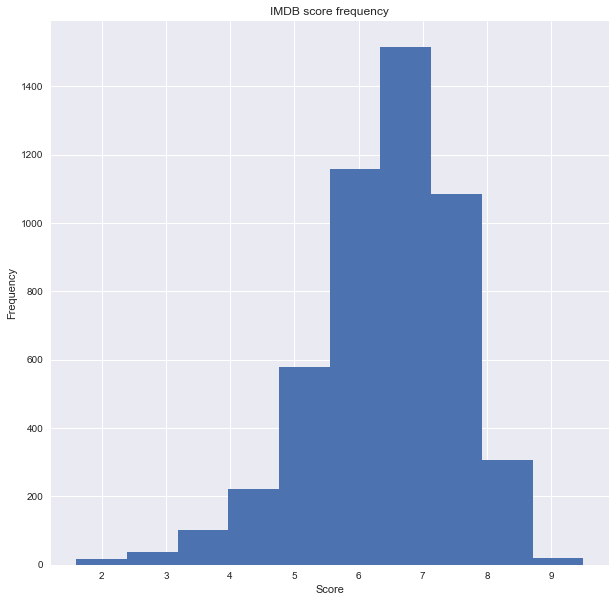

In [10]:
df["imdb_score"].hist(figsize=(10,10))
plt.title('IMDB score frequency')
plt.xlabel('Score')
plt.ylabel('Frequency')

### Distribution of IMDB Scores
Here, we see that the distribution of IMDB scores are left skewed, with a central point around 7.

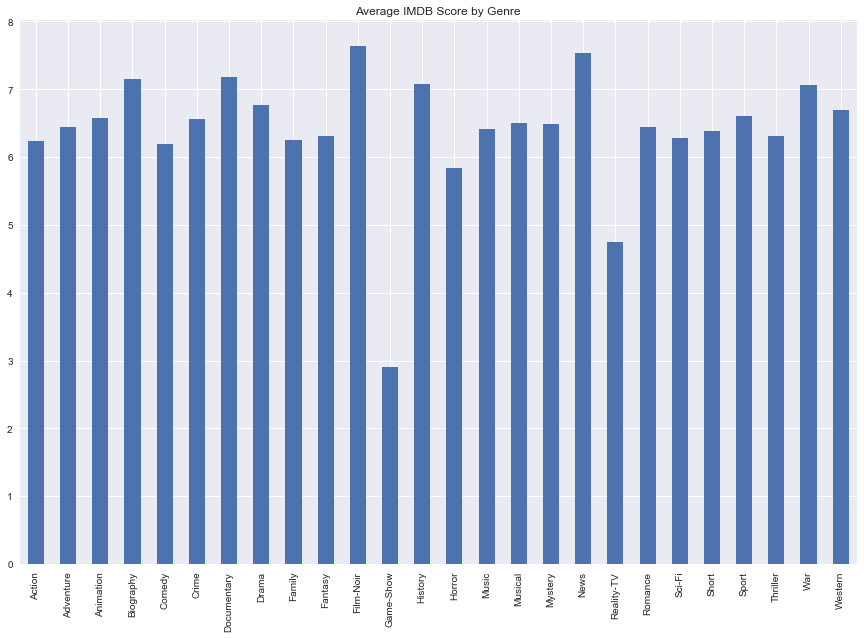

In [11]:
genre_count = [0] * len(genres)
imdb_score_sum = [0] * len(genres)

for _,movie in df.iterrows():
    genre_for_movie = movie["genres"]
    for genre in genre_for_movie:
        genre_count[genres.index(genre)] += 1
        imdb_score_sum[genres.index(genre)] += movie["imdb_score"]
        
avg_imdb_score = [float(sum) / float(count) for (count, sum) in zip(genre_count, imdb_score_sum)]
pd.Series(avg_imdb_score, index=genres).plot(kind='bar',
                                             title = "Average IMDB Score by Genre",
                                             figsize=(15,10))

### Average IMDB Score by Genre
Here, we see that IMDB likes Film-Noir, News, Documenatries, and Biographies the most, while it typically dislikes Game-Shows and Reality-TV Shows. 

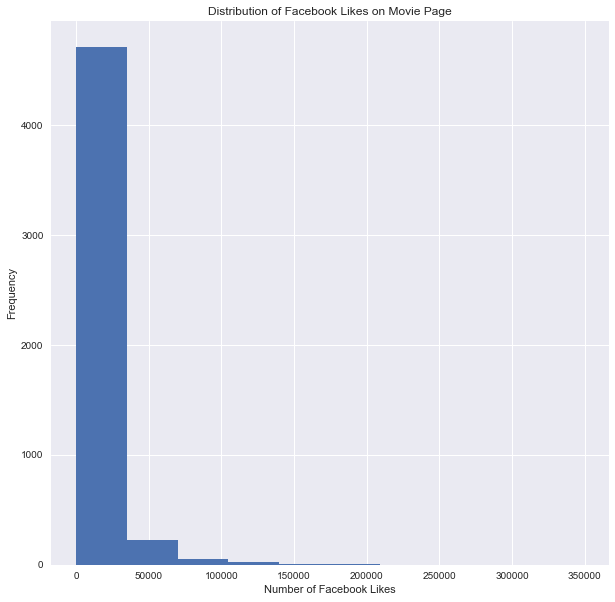

In [12]:
df["movie_facebook_likes"].hist(figsize=(10,10))
plt.title('Distribution of Facebook Likes on Movie Page')
plt.xlabel('Number of Facebook Likes')
plt.ylabel('Frequency')

### Distribution of Facebook Likes on Movie Pages
Here, we see that the distribution is highly right skewed; there are a small handful of super-popular movies, while the rest are moderately liked.

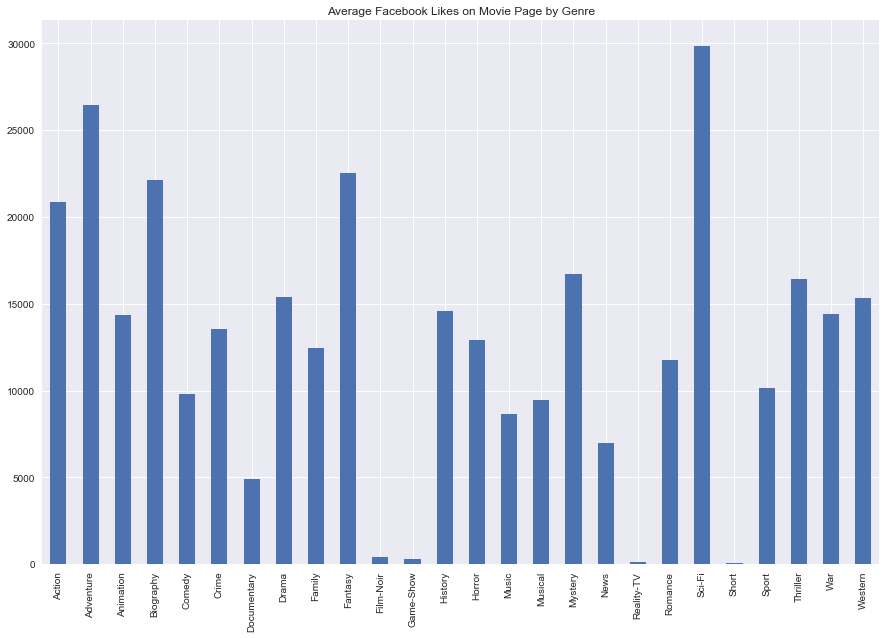

In [14]:
facebook_like_sum = [0] * len(genres)

for _,movie in df.iterrows():
    genre_for_movie = movie["genres"]
    for genre in genre_for_movie:
        imdb_score_sum[genres.index(genre)] += movie["movie_facebook_likes"]
        
avg_facebook_like = [float(sum) / float(count) for (count, sum) in zip(genre_count, imdb_score_sum)]
pd.Series(avg_facebook_like, index=genres).plot(kind='bar',
                                             title = "Average Facebook Likes on Movie Page by Genre",
                                             figsize=(15,10))

### Facebook Likes on Movie Page by Genre
Here, we see that Facebook users like Sci-Fi and Adventure movies the most, while there are almost no likes for Short films, Reality-TV, Game Shows, and Film-Noir.  

It appears that the tastes of the masses differ from the tastes of critics on IMDB, although they seem to both dislike Game-Shows.